# Avocado Type Categorization

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


## 1. Data Exploration

In this section, we will be performing Data Exploration to better understand the data we are working with. 

We shall make use of visualizations and statistics for this purpose.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data from file and take a peek
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Have a look at the different NUMERICAL columns in the dataset and the statistics for the same
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
# Convert the 'Date' column, which is a string type, into a python date object
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
## Check for Null values
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

As we can see above, we have no null values in our dataset.

Below, we can see a histogram of the Average Price.

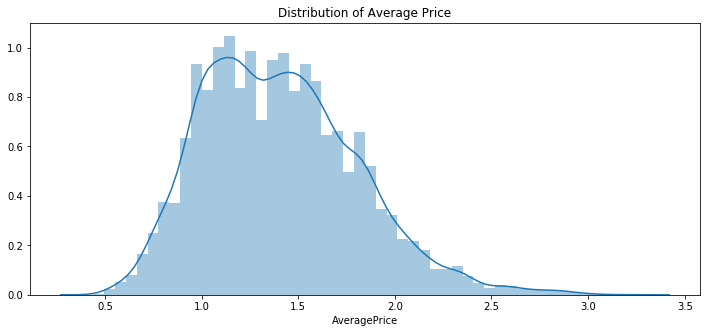

In [6]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Average Price')
sns.distplot(data['AveragePrice'])

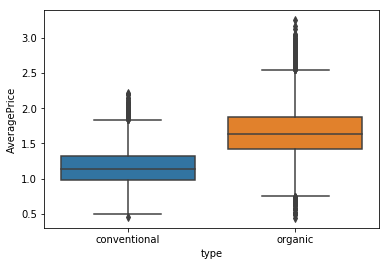

In [7]:
sns.boxplot(x='type', y='AveragePrice', data=data)

Above, we have constructed a box plot depicting the difference in Average Price for conventional and organic Avocados.
We can see a clear difference in the prices between these two.

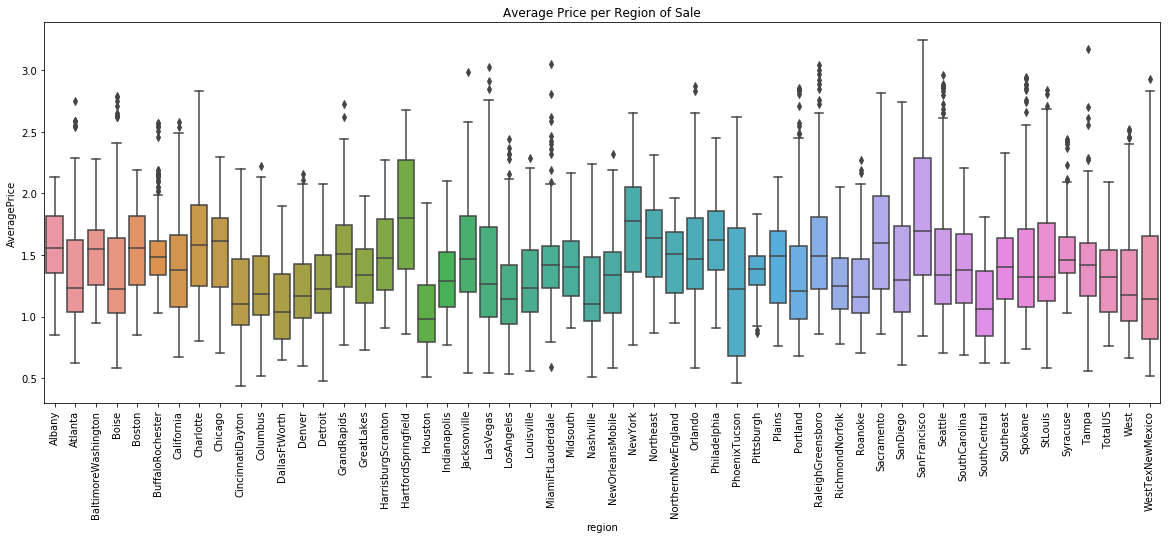

In [8]:
plt.figure(figsize=(20,7))
plt.title("Average Price per Region of Sale")
myfig = sns.boxplot(x='region', y='AveragePrice', data=data)
myfig = myfig.set_xticklabels(myfig.get_xticklabels(), rotation=90)

From the above box plot, we can see the variation in prices across various regions present in the dataset. We can clearly see that some regions have higher average pricing and some others have lower average pricing. This means that region plays a role in the price of the Avacado.

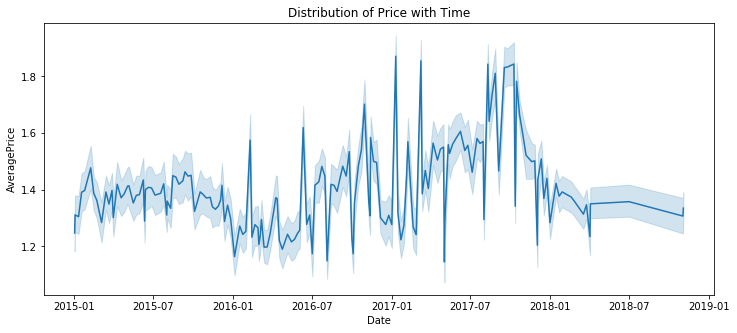

In [9]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Price with Time')
sns.lineplot(x='Date', y='AveragePrice', data=data)

The line plot above indicates that the average price of the avocado has fluctuated with the months during this period of data collection,

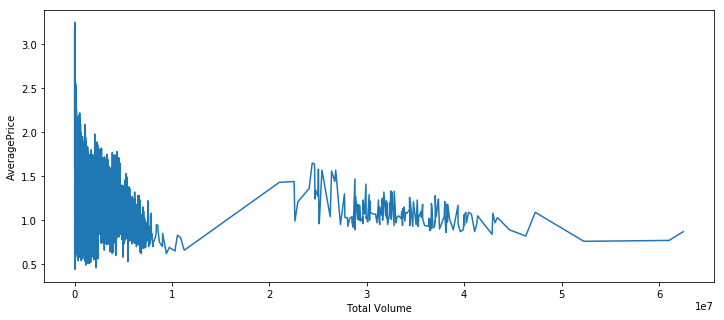

In [10]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Total Volume', y='AveragePrice', data=data)

The above does not seem to be useful.
This is mostly because while the volume may have an affect on average price, we must also consider the Region, type and date of sale before we can get to this, as these other features are likely to have an impact first on the price.

So, we shall check how the prices of Avacados vary with region and time for different types of Avocados. This will enable us to see the difference between these types of Avacados.

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


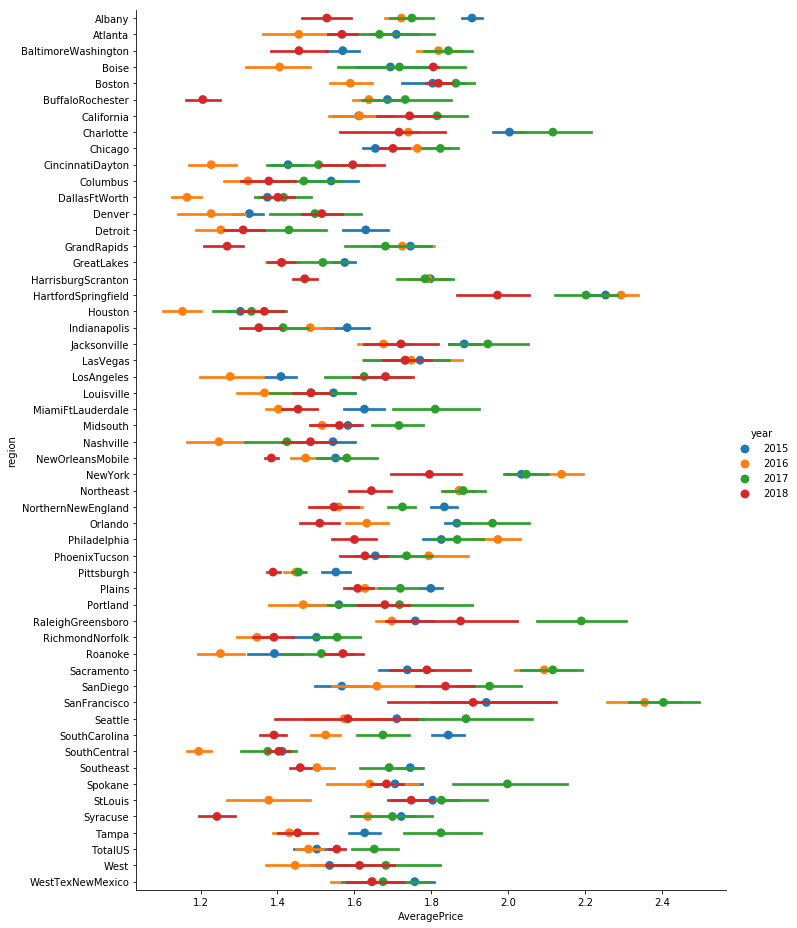

In [11]:
mask = data['type']=='organic'
g = sns.factorplot(x='AveragePrice',y='region',data=data[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   join=False,
              )

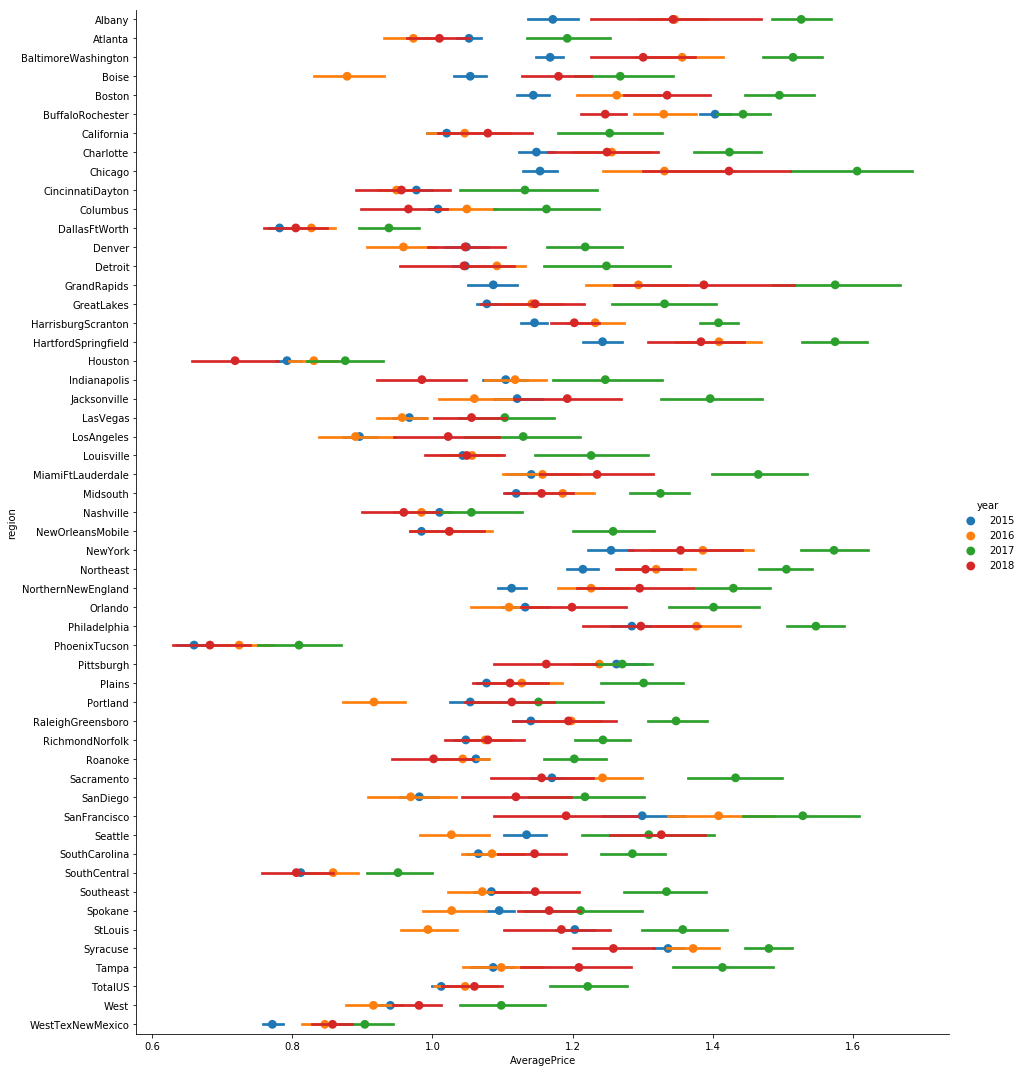

In [12]:
mask = data['type']=='conventional'
sns.factorplot(x='AveragePrice', y='region', data=data[mask], hue='year', height=15, aspect=0.9, join=False)

From the above plots, we can see that overall average price is lower for conventional Avacados across regions over time, as our previous boxplots suggested.

We can also see that the price of Avacados vary with time depending on the region i.e the way the prices vary across regions is dependant on the regions, making both of the features necessary for our classification of Avacados into conventional or organic.

In [13]:
# Removing the index column from the dataset
X = data.drop('Unnamed: 0', axis=1)
X.head(n=1)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


## 2. Data Preprocessing

In the below section, we shall preprocess the data into a form suitable for further work on the dataset; to that end, we shall take the columns indicated below as from the above visualizations, we have noticed that these are relevant to our problem statement.

In [14]:
cols = ['region', 'Total Volume', 'type', 'year', 'AveragePrice']
X = X[cols]

In [15]:
## Label encode region and type features
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(X['region'].drop_duplicates())
X['region'] = label.transform(X['region'])
label.fit(X['type'].drop_duplicates())
X['type'] = label.transform(X.type)
X.head()

,region,Total Volume,type,year,AveragePrice
0,0,64236.62,0,2015,1.33
1,0,54876.98,0,2015,1.35
2,0,118220.22,0,2015,0.93
3,0,78992.15,0,2015,1.08
4,0,51039.60,0,2015,1.28


Next, we shal plot heatmaps to check the correlation between our chosen features.

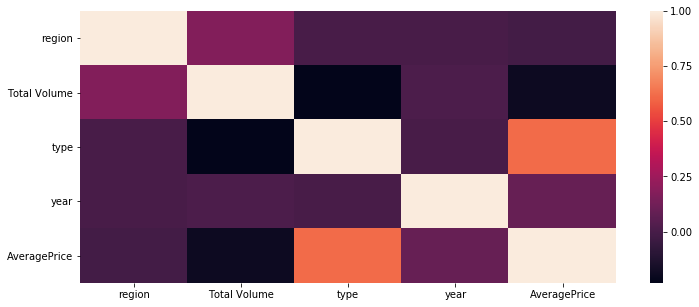

In [20]:
corrmap = X.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corrmap)

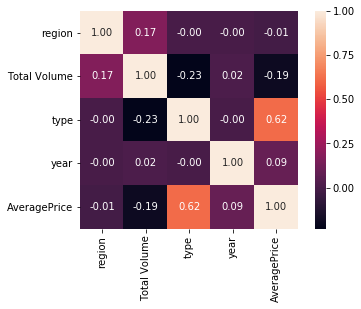

In [21]:
corrval = np.corrcoef(X.values.T)

hm = sns.heatmap(corrval, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)

As we can see, there are good amounts of correlation between volume, price and the type of avacado.

However, for region and year we do not seem to have any correlation at all. This may be because of the label encoding we performing in the previous step. As the label enconding just directly and arbitrarily encodes the feature values into numbers, there is a high chance that the variation between the feature and target is not at all captured.

## 3. Model Selection and Validation

Now, we shall split the data into train and test sets and perform model validation and selection.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
# get our train and test sets from the data
y = X.type
X = X.drop('type', axis=1)
X.head()

,region,Total Volume,year,AveragePrice
0,0,64236.62,2015,1.33
1,0,54876.98,2015,1.35
2,0,118220.22,2015,0.93
3,0,78992.15,2015,1.08
4,0,51039.60,2015,1.28


In [17]:
X.shape

(18249, 4)

As we saw earlier, our label encoding for the region and year features was not fruitful in terms of correlation. 

So, we shall one-hot encode these features to get rid of this issue.

In [18]:
test = pd.get_dummies(X.year)
X = X.drop('year', axis=1)
X = pd.concat([X, test], axis=1)
X.shape

(18249, 7)

In [19]:
test = pd.get_dummies(X.region)
X = X.drop('region', axis=1)
X = pd.concat([X,test], axis=1)

In [20]:
X.shape

(18249, 60)

In [25]:
# Perfom the train and test data split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14599, 60)
(3650, 60)
(14599,)
(3650,)


In [26]:
# Check for the Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'l1')
clf.fit(X_train,y_train)
print("Accuracy on the testing data is " + str(clf.score(X_test, y_test)))
print("Accuracy on the training data is "+str(clf.score(X_train, y_train)))

Accuracy on the testing data is 0.9978082191780822
Accuracy on the training data is 0.9985615453113227


c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
## Check with Random Forests
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy on the testing data is " + str(clf.score(X_test, y_test)))
print("Accuracy on the training data is "+str(clf.score(X_train, y_train)))

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy on the testing data is 0.9975342465753425
Accuracy on the training data is 0.999931502157682


From the above two tested classifiers, we can see that the Random Forest Classifier clearly sees beeter perfomance on the test set.

## 4. Hyperparameter Optimization

Now, we shall perform K-fold cross validation for the chosen RandomForestClassifier and then check for accuracy and then plot some metric plots.

In [31]:
from sklearn import model_selection
scoring=['accuracy']
kfold = model_selection.KFold(n_splits = 4, random_state = 47, shuffle=True)
cv_results = model_selection.cross_validate(clf, X_train, y_train, cv = kfold, scoring=scoring, return_train_score=True )
print("\nThe accuracy is:\n")
op="\nThe accuracy is:\n"
for met in scoring:
    key = 'test_'+met
    print(np.mean(cv_results[key]))
    op=op+str(np.mean(cv_results[key]))+"\n"


The accuracy is:

0.9963011258479524


In [38]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
param_dist = {
 'n_estimators': [50, 100],
 'max_depth' : [100, 150, 200, 300, 350, 500]
 }
scorer = make_scorer(accuracy_score)
gridsearch = GridSearchCV(clf, param_dist, scoring=scorer)
gridsearch.fit(X_train, y_train)

c:\users\athithya\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100], 'max_depth': [100, 150, 200, 300, 350, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [40]:
print(gridsearch.best_params_)
print("===========================================================================================")
print(gridsearch.best_score_)

{'max_depth': 500, 'n_estimators': 100}
0.9967806014110555


In [47]:
scoring=['accuracy']
clf = RandomForestClassifier(max_depth=500, n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
kfold = model_selection.KFold(n_splits = 4, random_state = 47, shuffle=True)
cv_results = model_selection.cross_validate(clf, X_train, y_train, cv = kfold, scoring=scoring, return_train_score=True )
print("\nThe accuracy is:\n")
op="\nThe accuracy is:\n"
for met in scoring:
    key = 'test_'+met
    print(np.mean(cv_results[key]))
    op=op+str(np.mean(cv_results[key]))+"\n"


The accuracy is:

0.9976025895629128


In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

Confusion Matrix: 
 [[1817    3]
 [   4 1826]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1820
           1       1.00      1.00      1.00      1830

   micro avg       1.00      1.00      1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650



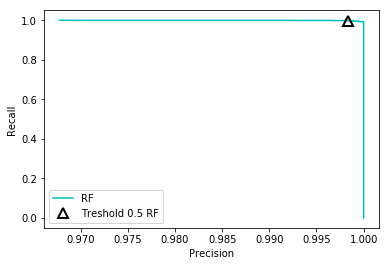

In [49]:
from sklearn.metrics import precision_recall_curve
precision_rf,recall_rf,thresholds_rf = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.plot(precision_rf,recall_rf,label = 'RF', color = 'c')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf],
        recall_rf[close_default_rf],'^',c = 'k', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", mew = 2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

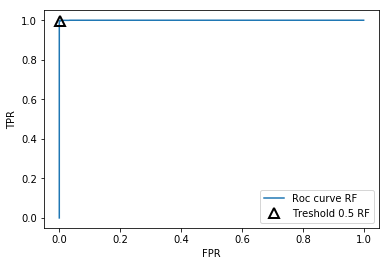

In [50]:
from sklearn.metrics import roc_curve, auc
fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf,tpr_rf, label = "Roc curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf],
        tpr_rf[close_default_rf],'^', markersize = 10,
        label = "Treshold 0.5 RF", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)